In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [6]:
df = pd.DataFrame({
    'movie': ['MIB','Gadar 2','Rocky and Rani','OMG 2'],
    'rating': [8.0,6.2,7.2,8.2],
    'duration': [160,170,168,155],
    'genre': ['action','action','comedy','comedy']
})
print(df)

            movie  rating  duration   genre
0             MIB     8.0       160  action
1         Gadar 2     6.2       170  action
2  Rocky and Rani     7.2       168  comedy
3           OMG 2     8.2       155  comedy


In [7]:
le = LabelEncoder()
df['genre_enc'] = le.fit_transform(df['genre'])     # 0: action & 1: comedy
print(df)

            movie  rating  duration   genre  genre_enc
0             MIB     8.0       160  action          0
1         Gadar 2     6.2       170  action          0
2  Rocky and Rani     7.2       168  comedy          1
3           OMG 2     8.2       155  comedy          1


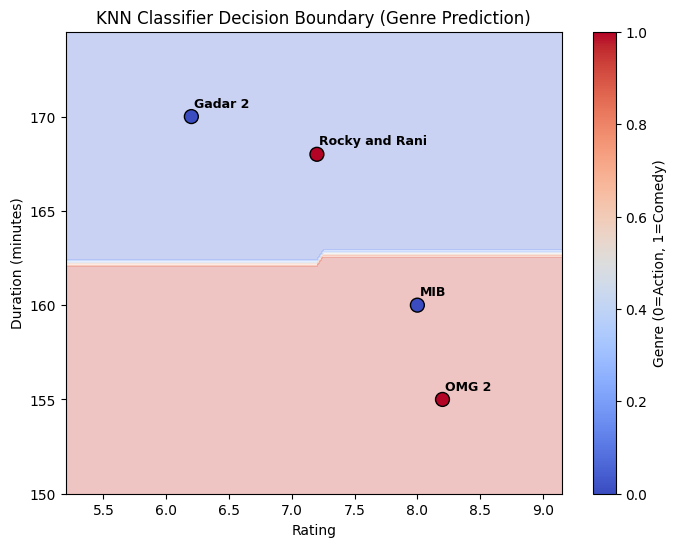

The barbie movie which has 7.4 rating and 114 duration is a 'Comedy' Genre movie


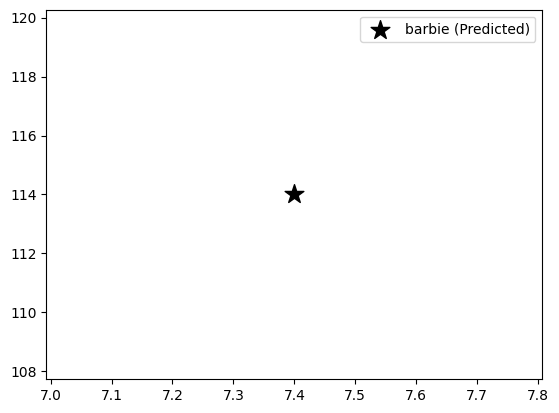

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3)
X = df[['rating','duration']].values
y = df['genre_enc']
knn.fit(X, y)


# Create a meshgrid for decision boundary
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.5))

# Predict for each point in meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plotting the Decision Boundary ---
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=100)

# Labels and Title
plt.xlabel("Rating")
plt.ylabel("Duration (minutes)")
plt.title("KNN Classifier Decision Boundary (Genre Prediction)")
plt.colorbar(label="Genre (0=Action, 1=Comedy)")

# Show points with movie names
for i, txt in enumerate(df['movie']):
    plt.text(X[i,0]+0.02, X[i,1]+0.5, txt, fontsize=9, fontweight='bold')

plt.show()


movie = str(input("Enter the name of movie: "))
rating = float(input("Enter the rating of movie (0.0 to 10.0): "))
duration = int(input("Enter the duration of movie (in minutes): "))

prediction = knn.predict([[rating,duration]])[0]

if prediction == 0:
    print(f"The {movie} movie which has {rating} rating and {duration} duration is a 'Action' Genre movie")
else:
    print(f"The {movie} movie which has {rating} rating and {duration} duration is a 'Comedy' Genre movie")

new_point = np.array([[rating, duration]])
plt.scatter(rating, duration, color='black', marker='*', s=200, label=f'{movie} (Predicted)')
plt.legend()
plt.show()